# Beautiful Soup 맛보기

* Beautiful Soup은 '스크래핑' 기술이다.  
왜 soup일까? html로 범벅이 된 코드는 이것저것이 뒤섞인 soup같다고 했다고 한다.  
그래서 이 soup에서 아름답게 작업하는 방법이다 해서 Beautiful Soup이라고 한다.

## 크롤링? 스크래핑? 의 개념

한국에서는 웹 크롤링이라 하고, 해외에서는 웹 스크롤링이라고 함.  
둘은 다른 의미이다.   

https://blog.codef.io/crawling_vs_scraping/  

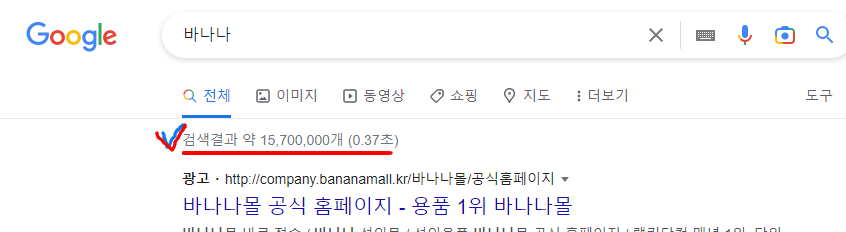

1500만개를 넘는 페이지를 0.37초만에 찾았다. 이게 가능한 일인가?  
사실은, 사용자가 검색하지 않더라도 구글의 가상 웹 브라우저 봇이, 여러 키워드로 웹사이트들을 찾아다니고 있다.  

이것이 바로 웹 크롤링이다.  
웹 크롤링은 여러 페이지를 돌아다니면서 정보를 모으는 것을 의미하며,  
웹 스크래핑은 한 페이지의 정보를 모으는 것을 의미한다.  

* 비슷한 것으로, 스프링과 스프링부트  
기존 복잡하던 java의 개발 방법을 

In [1]:
from bs4 import BeautifulSoup

In [2]:
# 간단한 페이지 만들기
test_html = '''
<html>
<head></head>

<body>
<h1 id = 'title'> 새싹반 </h1>

<div>
    <ul class='name'>
        <li><a href='https://www.naver.com'>네이버로 갈래요</a></li>
    </ul>

    <ul class='brand'>
        <li><a href='https://www.google.com'>구글로 갈래요</a></li>
        <li><a href='https://www.youtube.com'>유튜브로 갈래요</a></li>
    </ul>
</div>
</body>
</html>
'''

In [5]:
# 뷰티플슾에 넘기기
soup = BeautifulSoup(test_html, 'html.parser')
soup


<html>
<head></head>
<body>
<h1 id="title"> 새싹반 </h1>
<div>
<ul class="name">
<li><a href="https://www.naver.com">네이버로 갈래요</a></li>
</ul>
<ul class="brand">
<li><a href="https://www.google.com">구글로 갈래요</a></li>
<li><a href="https://www.youtube.com">유튜브로 갈래요</a></li>
</ul>
</div>
</body>
</html>

In [6]:
soup.prettify()

'<html>\n <head>\n </head>\n <body>\n  <h1 id="title">\n   새싹반\n  </h1>\n  <div>\n   <ul class="name">\n    <li>\n     <a href="https://www.naver.com">\n      네이버로 갈래요\n     </a>\n    </li>\n   </ul>\n   <ul class="brand">\n    <li>\n     <a href="https://www.google.com">\n      구글로 갈래요\n     </a>\n    </li>\n    <li>\n     <a href="https://www.youtube.com">\n      유튜브로 갈래요\n     </a>\n    </li>\n   </ul>\n  </div>\n </body>\n</html>\n'

In [7]:
## 요소 찾기 방법 1

soup.h1

<h1 id="title"> 새싹반 </h1>

In [8]:
soup.div

<div>
<ul class="name">
<li><a href="https://www.naver.com">네이버로 갈래요</a></li>
</ul>
<ul class="brand">
<li><a href="https://www.google.com">구글로 갈래요</a></li>
<li><a href="https://www.youtube.com">유튜브로 갈래요</a></li>
</ul>
</div>

In [9]:
soup.li

<li><a href="https://www.naver.com">네이버로 갈래요</a></li>

In [ ]:
# 요소 찾기 방법 2
# find와 findall을 자주 사용한다.

In [10]:
soup.find('li')

<li><a href="https://www.naver.com">네이버로 갈래요</a></li>

In [12]:
soup.find_all('li')

[<li><a href="https://www.naver.com">네이버로 갈래요</a></li>,
 <li><a href="https://www.google.com">구글로 갈래요</a></li>,
 <li><a href="https://www.youtube.com">유튜브로 갈래요</a></li>]

In [13]:
result_a = soup.find_all('a')
result_a

[<a href="https://www.naver.com">네이버로 갈래요</a>,
 <a href="https://www.google.com">구글로 갈래요</a>,
 <a href="https://www.youtube.com">유튜브로 갈래요</a>]

## 시맨틱 웹

http://terms.tta.or.kr/dictionary/dictionaryView.do?subject=%EC%8B%9C%EB%A7%A8%ED%8B%B1+%EC%9B%B9  
기컴퓨터가 사람을 대신하여 정보를 읽고 이해하고 가공하여 새로운 정보를 만들어 낼 수 있도록, 이해하기 쉬운 의미를 가진 차세대 지능형 웹.  
기계가 웹사이트를 이해하기 쉽도록 하려면, 그 격식에 맞춰 작성을 해놔야 한다.  
예를 들어 아래와 같다.  

In [ ]:
'''
<html>
<head></head>
<body>
<h1 id = 'title'> 새싹반 </h1>
안녕하세요
</body>
</html>
'''

In [ ]:
'''
<html>
<head></head>
<body>
<h1 id = 'title'> 새싹반 </h1>
<p>안녕하세요</p>
</body>
</html>
'''

위 두 개 코드에서 '안녕하세요' 키워드를 찾고 싶다고 해보자.  
어떤 것이 찾기가 더 쉬울까?  

바로, `<p>` 태그가 붙은 아래쪽 코드이다.  

윗 코드에서 안녕하세요를 찾으려면..
soup으로는 방법이 없거나, 돌아돌아 방법을 만들어야 한다.  

하지만, 아래 코드에서는 `<p>` 키워드로 찾으면 쉽게 찾을 수 있다.
이게 바로 시맨틱한 웹이라고 할 수 있다.  

## 스크래핑을 할 때에는 조심해야 한다.  

* 저작권이 있는 문제이므로, 잘못 사용했을 때에는 큰 금액의 손해배상을 해야할 수 있다.  
* 이에, 문제가 되지 않는 선 까지만 이용하기를 꼭 명심해야 한다.  

## 다시 코드로 돌아가서

In [22]:
from bs4 import BeautifulSoup
# 간단한 페이지 만들기
test_html = '''
<html>
<head></head>

<body>
<h1 id = 'title'> 새싹반 </h1>

<div>
    <ul class='name'>
        <li><a class = 'to_naver' href='https://www.naver.com'>네이버로 갈래요</a></li>
    </ul>

    <ul class='brand'>
        <li><a href='https://www.google.com'>구글로 갈래요</a></li>
        <li><a href='https://www.youtube.com'>유튜브로 갈래요</a></li>
    </ul>
</div>
</body>
</html>
'''

In [23]:
# 뷰티플슾에 넘기기
soup = BeautifulSoup(test_html, 'html.parser')
soup.a.attrs

{'class': ['to_naver'], 'href': 'https://www.naver.com'}

In [26]:
res = soup.find('a', attrs={'class':'to_naver'})
print(res)
print(res.string)

<a class="to_naver" href="https://www.naver.com">네이버로 갈래요</a>
네이버로 갈래요


In [28]:
res = soup.find('a', attrs={'class':'to_naver'})
print(res)
print(res.text)

<a class="to_naver" href="https://www.naver.com">네이버로 갈래요</a>
네이버로 갈래요


In [30]:
res = soup.find('div')
print(res)
print(res.str)

<div>
<ul class="name">
<li><a class="to_naver" href="https://www.naver.com">네이버로 갈래요</a></li>
</ul>
<ul class="brand">
<li><a href="https://www.google.com">구글로 갈래요</a></li>
<li><a href="https://www.youtube.com">유튜브로 갈래요</a></li>
</ul>
</div>
None


In [32]:
soup.select('div>ul.brand>li')
# 상위 클래스 내에 있는 하위 클래스를 연결하는 방법 : >
# 꺽쇠로 A 안의 B 안의 C를 추출하는 걸 표시하면  A > B > C 로 할 수 있다.

[<li><a href="https://www.google.com">구글로 갈래요</a></li>,
 <li><a href="https://www.youtube.com">유튜브로 갈래요</a></li>]

# 할리스 커피 분석

* 할리스 커피에서 매장 정보를 가져올 것이다.  

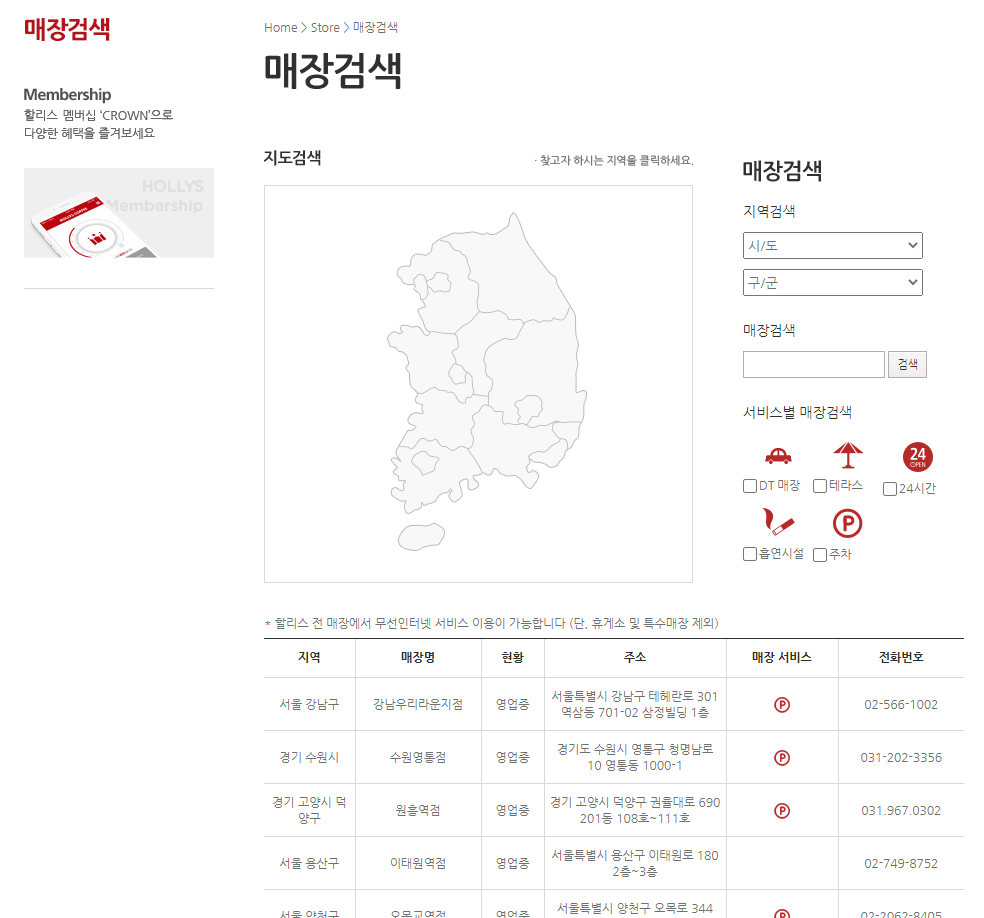

## 웹 페이지 분석

* 페이지 주소는 다음과 같은 형식을 가진다.  
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=53&sido=&gugun=&store=  
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=51&sido=&gugun=&store=  
pageNo = 페이지넘버  

* 테이블은 아래와 같은 규칙을 가진다. : 클래스명  
`<div class="tableType01">`  

* 테이블의 head는 아래와 같은 규칙을 가진다. : th scope  
`<th scope="col" class="noline">지역</th>`  
`<th scope="col">매장명</th>`  
`<th scope="col">현황</th>`  
`<th scope="col">주소</th>`  
`<th scope="col">매장 서비스</th>`  
`<th scope="col">전화번호</th>`  

* 테이블의 내용은 아래와 같은 규칙을 가진다. :   
`<td class="noline center_t">부산 북구</td>,`  
`<td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산화명점</a></td>,`  
`<td class="center_t tdp0">영업중</td>,`  
`<td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산광역시 북구 금곡대로285번길 13 (화명동, 스포렉스) 스포렉스 106호,107호,108호</a></td>,`  
`<td class="center_t">`  
`<img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>`  
`</td>,`  
`<td class="center_t">070-8884-1101</td>`  

* 가져올 정보 지정하기  
0번, 1번, 3번, 6번을 가져오기로 정한다.  

## 스크래핑(수업)

In [34]:
# import
from bs4 import BeautifulSoup
import urllib.request

In [38]:
# url 규칙 만들기
page_num = 2
url = f'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo={page_num}&sido=&gugun=&store='
html = urllib.request.urlopen(url)

html

In [39]:
# Beautiful Soup 만들기
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>할리스</title>
<meta charset="utf-8"/>
<meta content="HOLLYS" name="Subject">
<meta content="HOLLYS" name="Title"/>
<meta content="HOLLYS,HOLLYS,할리스,할리스,커피" name="Keywords"/>
<meta content="할리스는 1998년 국내 첫 에스프레소 커피전문점을 개점한 순수 국내브랜드로서 당당하게 시장 선점이라는 확고한 위치를 확보하고 국내 에스프레소 커피시장을 주도해 나가고 있습니다." name="Description"/>
<meta content="HOLLYS F&amp;B" name="Author"/>
<meta content="HOLLYS F&amp;B" name="Publisher"/>
<meta content="COFFEE,커피,음료,푸드" name="Classification"/>
<meta content="Korea" name="Location"/>
<meta content="2015.04.01" name="Author-Date"/>
<meta content="2023.01.10" name="Date"/>
<meta content="HOLLYS, HOLLYS F&amp;B" name="Distribution"/>
<meta content="HOLLYS" name="Copyright"/>
<meta content="website" property="og:type"/>
<meta content="할리스" property="og:title"/>
<meta content="HOLLYS" property="og:description"/>
<meta content="https://www.hollys.co.kr/" property="og:url">
<link hr

In [99]:
# 표를 추출하기
tbody = soup.find_all('tr')
tbody[1]

<tr>
<!--
				<td class="noline center_t">
																<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr/websrc/images/store/ico_favorite_off.png" alt="즐겨찾기"></a>
									</td>
				 -->
<td class="noline center_t">부산 북구</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산화명점</a></td>
<td class="center_t tdp0">영업중</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산광역시 북구 금곡대로285번길 13 (화명동, 스포렉스) 스포렉스 106호,107호,108호</a></td>
<td class="center_t">
<img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
</td>
<td class="center_t">070-8884-1101</td>
</tr>

In [101]:
# tr 가져오기
tr = tbody[1].find_all('td')
tr

[<td class="noline center_t">부산 북구</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산화명점</a></td>,
 <td class="center_t tdp0">영업중</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산광역시 북구 금곡대로285번길 13 (화명동, 스포렉스) 스포렉스 106호,107호,108호</a></td>,
 <td class="center_t">
 <img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
 </td>,
 <td class="center_t">070-8884-1101</td>]

In [91]:
# 표 안의 내용 추출하기
tds = tr0[1].find_all('td')
tds

[<td class="noline center_t">부산 북구</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산화명점</a></td>,
 <td class="center_t tdp0">영업중</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산광역시 북구 금곡대로285번길 13 (화명동, 스포렉스) 스포렉스 106호,107호,108호</a></td>,
 <td class="center_t">
 <img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
 </td>,
 <td class="center_t">070-8884-1101</td>]

In [89]:
# 가져올 정보 지정하기
# 0번, 1번, 3번, 6번을 가져오기로 정한다.  

In [95]:
td0 = tds[0].string
td1 = tds[1].string
td3 = tds[3].string
td5 = tds[5].string

td0, td1, td3, td5

('부산 북구',
 '부산화명점',
 '부산광역시 북구 금곡대로285번길 13 (화명동, 스포렉스) 스포렉스 106호,107호,108호',
 '070-8884-1101')

In [104]:
# 표에서 데이터 가져오기 함수 지정

def get_text(html):
    region = []
    name = []
    adress = []
    phone = []
    from bs4 import BeautifulSoup
    import urllib.request
    soup = BeautifulSoup(html, 'html.parser')
    tbody = soup.find_all('tr')
    for i in tbody:
        tr = i.find_all('td')
        for j in tr:
            region.append(j[0].string)
            name.append(j[1].string)
            adress.append(j[3].string)
            phone.append(j[5].string)
    return region, name, adress, phone

In [105]:
page_num = 2
url = f'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo={page_num}&sido=&gugun=&store='
html = urllib.request.urlopen(url)

region, name, adress, phone = get_text(html)
region

KeyError: 0

## 직접 해보기

In [73]:
tbody

[<tr>
 <th class="noline" scope="col">지역</th>
 <th scope="col">매장명</th>
 <th scope="col">현황</th>
 <th scope="col">주소</th>
 <th scope="col">매장 서비스</th>
 <th scope="col">전화번호</th>
 </tr>,
 <tr>
 <!--
 				<td class="noline center_t">
 																<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr/websrc/images/store/ico_favorite_off.png" alt="즐겨찾기"></a>
 									</td>
 				 -->
 <td class="noline center_t">부산 북구</td>
 <td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산화명점</a></td>
 <td class="center_t tdp0">영업중</td>
 <td class="center_t"><a href="#" onclick="javascript:storeView(1020); return false;">부산광역시 북구 금곡대로285번길 13 (화명동, 스포렉스) 스포렉스 106호,107호,108호</a></td>
 <td class="center_t">
 <img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
 </td>
 <td class="center_t">070-8884-1101</td>
 </tr>,
 <tr>
 <!--
 				<td class="noline center_t">
 																<a href="javascript:g